In [1]:
import numpy as np
import csv
import os
import matplotlib.pyplot as plt
import latex

from Viterbi import *

In [2]:
# Generators for Convolutional Codes

# Redundancy generators
generators = [[1,1,1],[1,0,1]]

# Bit receiver
# From index 0 corresponds to [x[n], x[n-1], x[n-2]]


bits_in = [1,1,0,1,0,0,1]

# Finite State Machine descripted for convolutional codes
FSM = [[0b00, None, 0b11, None],
       [0b11, None, 0b00, None],
       [None, 0b10, None, 0b01],
       [None, 0b01, None, 0b10]]

In [7]:
# Testbench

# 2. by p value in BSC from 0.01 to 0.3 by step 0.01
iter  = 1000

path = 'testbench2/'
filename = 'test'
ext = '.csv'

# createFolder(path)
accu_lst = []
for p in range(1,31):
    n_err = 0
    f = open(path + filename + str(p) + ext,'w',newline='')
    wr = csv.writer(f)
    wr.writerow(['No.','bits','Input','Tx','Rx','Decoded','Error'])
    for n in range(1,33):
        for i in range(iter):
            
            bits_in = list(np.random.randint(2, size = n))
            bits_in = bits_in + [0,0]
            
            tx = encode(bits_in, generators)
            rx = bsc(tx, 0.01*p)
            
            decoded, error = viterbi(rx, FSM)
            
            if bits_in != decoded:
                n_err = n_err + 1
                # add error case to new line of csv file
                wr.writerow([n_err,str(n)+" bits",bits_in,tx,rx,decoded,error])
            # if (i+1) % 100 == 0:
            #     print("%d-th iteration test complete." % (i+1))
        
        
    accuracy = n_err / (32*iter)
    print(p)
    print("p=%0.2f test complete." % (0.01*p))
    print("Number of error =", n_err)
    print("Accuracy =", accuracy)
    print()
    
    wr.writerow(["Iteration time = {0}, n_err = {1}, Accuracy = {2}".format(iter,n_err,accuracy)])
    
    accu_lst.append(accuracy)



1
p=0.01 test complete.
Number of error = 36
Accuracy = 0.001125

2
p=0.02 test complete.
Number of error = 238
Accuracy = 0.0074375

3
p=0.03 test complete.
Number of error = 582
Accuracy = 0.0181875

4
p=0.04 test complete.
Number of error = 1211
Accuracy = 0.03784375

5
p=0.05 test complete.
Number of error = 2069
Accuracy = 0.06465625

6
p=0.06 test complete.
Number of error = 3275
Accuracy = 0.10234375

7
p=0.07 test complete.
Number of error = 4675
Accuracy = 0.14609375

8
p=0.08 test complete.
Number of error = 6179
Accuracy = 0.19309375

9
p=0.09 test complete.
Number of error = 7863
Accuracy = 0.24571875

10
p=0.10 test complete.
Number of error = 9675
Accuracy = 0.30234375

11
p=0.11 test complete.
Number of error = 11645
Accuracy = 0.36390625

12
p=0.12 test complete.
Number of error = 13579
Accuracy = 0.42434375

13
p=0.13 test complete.
Number of error = 15170
Accuracy = 0.4740625

14
p=0.14 test complete.
Number of error = 16937
Accuracy = 0.52928125

15
p=0.15 test compl

In [8]:
# Setting plt parameters
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern Serif",

})

In [15]:
print(range(0.01,0.31,1))

TypeError: 'float' object cannot be interpreted as an integer

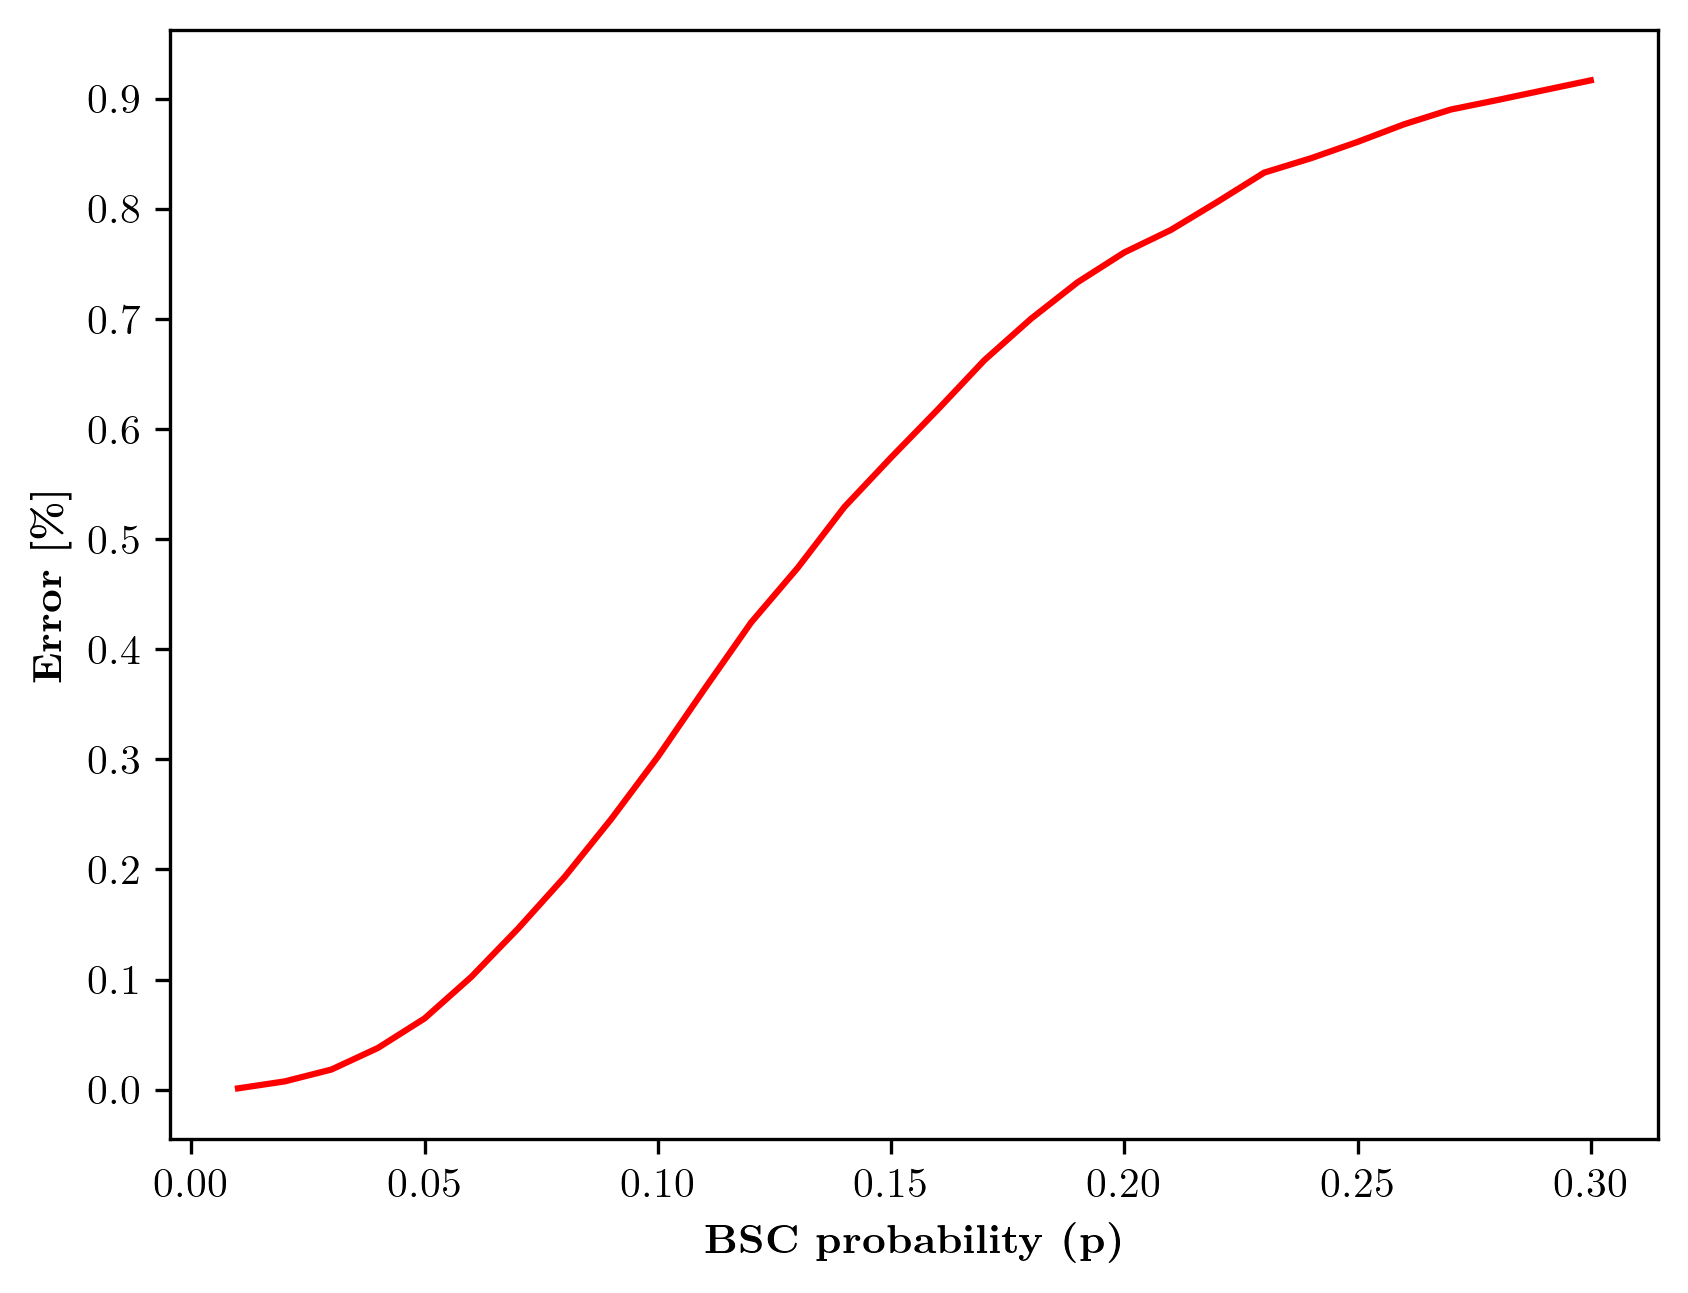

In [18]:
fig = plt.figure(dpi=300)

p = np.arange(0.01,0.31,0.01)
# p = range(1,31)
plt.plot(p, accu_lst, 'r')

plt.xlabel(r'\textbf{BSC probability (p)}', weight='bold')
plt.ylabel(r'\textbf{Error [\%]}', weight='bold')
plt.yticks(np.arange(0, 1, step=0.1))
# plt.xticks(range(0.01,0.31,0.01))
# plt.legend()

plt.show()